In [16]:
#import library that will be used for the analysis
import pandas as pd
import matplotlib.pyplot  as plt
import numpy as np
import seaborn as sns

In [3]:
#read the energy dataset
df1=pd.read_csv('energydata_complete.csv')

In [4]:
#check if they are null dat in the datset
df1.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [8]:
#Explore the data to know 
df1.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [13]:

print(f'The number of rows is the dataset is {df1.shape[0]} \nThe number of columns in the dataset is {df1.shape[1]}')

The number of rows is the dataset is 19735 
The number of columns in the dataset is 27


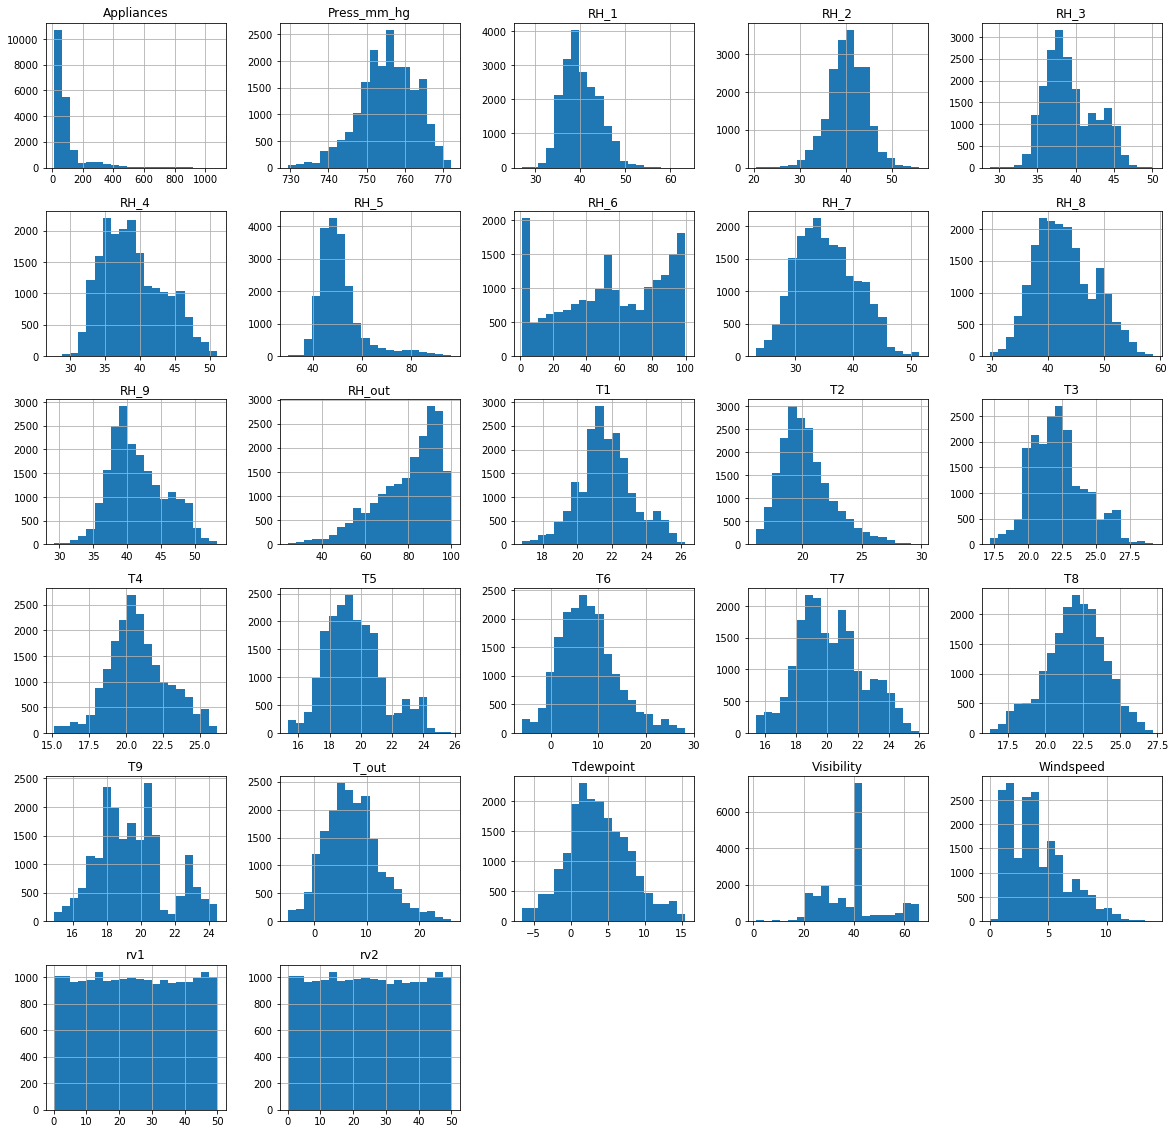

In [18]:
# visualizing the histogram of all features to understand the  distribution and to make conlusions of ots linearity

df1.hist(bins=20, figsize=(20,20));

In [10]:
# dropping the lights column
df1.drop(['lights'], axis=1,inplace=True)

# dropping the date column since its not a time series problem
df1.drop(['date'], axis=1, inplace=True)

In [47]:
df1.corr()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
Appliances,1.000000,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,0.019760,...,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145
T1,0.055447,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,0.885247,...,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
RH_1,0.086031,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,0.205797,...,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
T2,0.120073,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,0.720550,...,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
RH_2,-0.060465,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,0.110409,...,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
T3,0.085060,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,0.888169,...,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
RH_3,0.036292,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,-0.050062,...,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
T4,0.040281,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,0.871813,...,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815
RH_4,0.016965,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,0.091812,...,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787
T5,0.019760,0.885247,0.205797,0.720550,0.110409,0.888169,-0.050062,0.871813,0.091812,1.000000,...,0.911055,0.072308,0.651321,-0.170999,-0.273953,-0.145011,-0.084164,0.588362,-0.005490,-0.005490


## 0bservations

* Date is also of no use as it has 100% uniqueness
* T9  is the most correlation with other fields T3, T5 and T7
* The random datas inputed also have high correlation with each other and have high unique values
* Temperature columns - Temperature inside the house varies between 14.89 Deg & 29.85 Deg , temperatire outside (T6) varies    * between -6.06 Deg to 28.29 Deg . The reason for this variation is sensors are kept outside the house
* Humidiy columns - Humidity inside house varies is between 20.60% to 63.36% with exception of RH_5 (Bathroom) and RH_6 (Outside house) which varies between 29.82% to 96.32% and 1% to 99.9% respectively.
* Appliances - 75% of Appliance consumption is less than 100 Wh . With the maximum consumption of 1080 Wh , there will be outliers in this column and there are small number of cases where consumption is very high
* its safe to say RH_6, RH_out, Visibility and windspeed have irregular distribution.
* Light has not effect on our dataset has it has 15252(77.3%) zeros

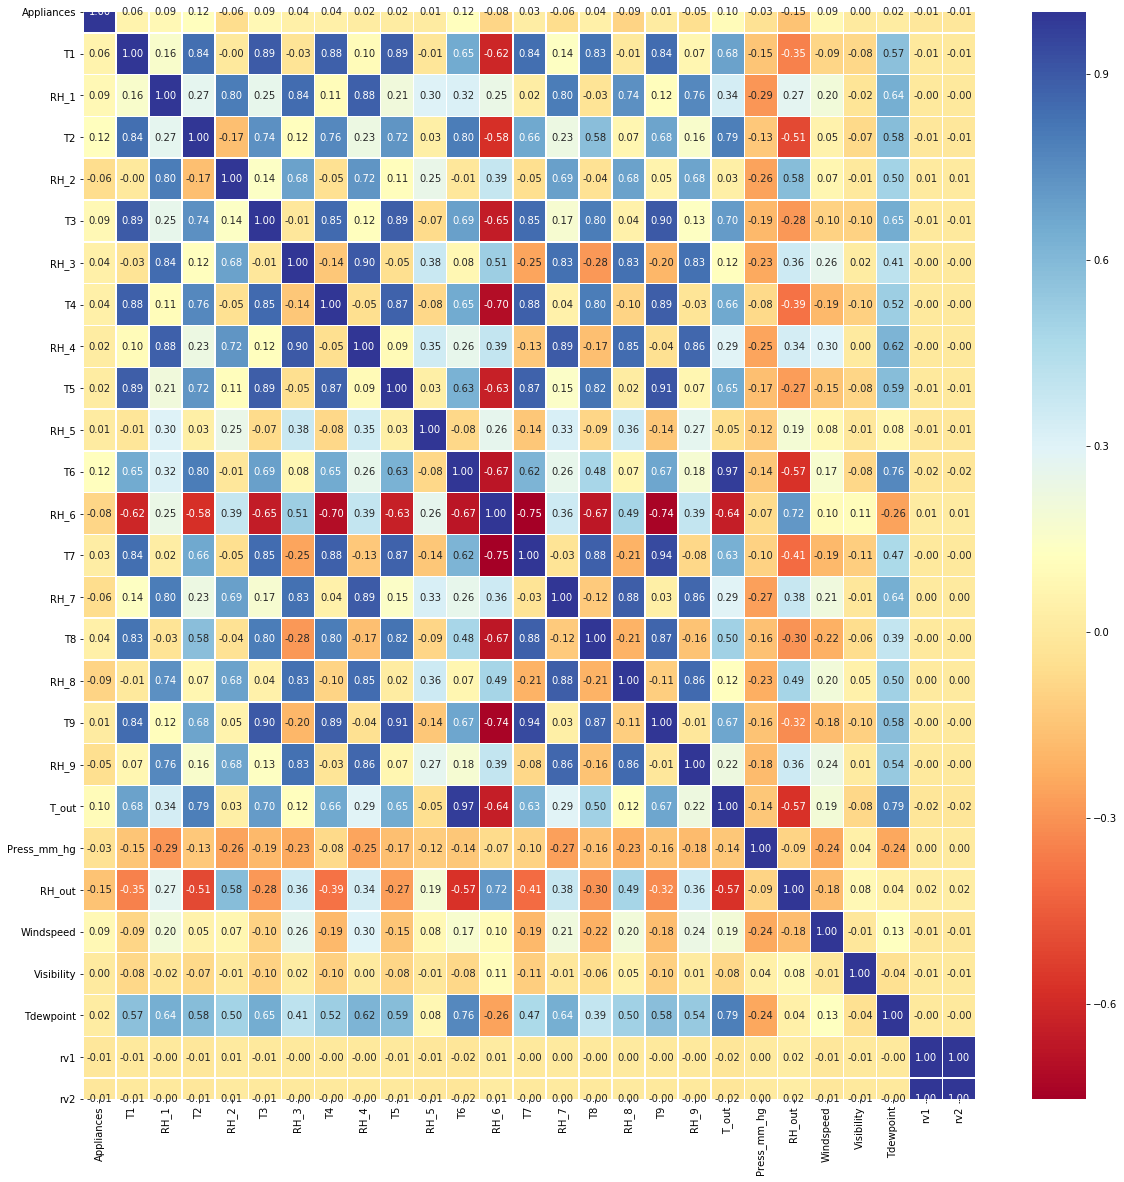

In [19]:
# using the heatmap to visualise the corelations in the  
plt.figure(figsize = (20,20))
sns.heatmap(df1.corr(), annot = True, cmap='RdYlBu', fmt ='.2f', linewidths = 0.5)


In [20]:
# Applying MinMaxScaler to scale the features column 

from sklearn.preprocessing import MinMaxScaler

# instantiate the scaler
scaler = MinMaxScaler()

# normalizing the features
normalise_df = pd.DataFrame(scaler.fit_transform(df1), columns = df1.columns)
features_df = normalise_df.drop(columns = ["Appliances"])
target_df = normalise_df["Appliances"]

In [21]:
#Now, we split our dataset into the training and testing dataset. Recall that we had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, target_df, test_size=0.3, random_state=42)

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)

In [22]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 2) 	#prints 

0.05

In [23]:
#r2_score
from sklearn.metrics import r2_score
r2_score = r2_score(y_test,predicted_values)
round(r2_score,2)

0.15

In [24]:
#rss
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 2)


45.35

In [25]:
#rmse
from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3) 

0.088

In [37]:
#comparing the effects of regularisation
def get_weights_df(linear_model, feat, col_name):
  #this function returns the weight of every feature
  weights = pd.Series(linear_model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

In [ ]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [41]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)


Ridge(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [42]:
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

In [43]:
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,RH_2,-0.456698,-0.411071,-0.000000
1,T_out,-0.321860,-0.262172,0.000000
2,T2,-0.236178,-0.201397,0.000000
3,T9,-0.189941,-0.188916,-0.000000
4,RH_8,-0.157595,-0.156830,-0.000110
5,RH_out,-0.077671,-0.054724,-0.049557
6,RH_7,-0.044614,-0.045977,-0.000000
7,RH_9,-0.039800,-0.041367,-0.000000
8,T5,-0.015657,-0.019853,-0.000000
9,T1,-0.003281,-0.018406,0.000000


In [50]:
# Applying MinMaxScaler to scale the features column 

from sklearn.preprocessing import MinMaxScaler

# instantiate the scaler
scaler = MinMaxScaler()

# normalizing the features
normalise_df = pd.DataFrame(scaler.fit_transform(df1), columns = df1.columns)
features_df = normalise_df["T2"]
target_df = normalise_df["T6"]

In [51]:
array = np.array([features_df])
feature = array.reshape(-1,1)

In [53]:
#Now, we split our dataset into the training and testing dataset. Recall that we had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feature, target_df, test_size=0.3, random_state=42)

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)
from sklearn.metrics import r2_score
r2_score = r2_score(y_test,predicted_values)
round(r2_score,3)

0.643